In [ ]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [ ]:
os.environ['KAGGLE_USERNAME'] = "xxxx"
os.environ['KAGGLE_KEY'] = "xxxx"

In [ ]:
!kaggle datasets files maparla/prado-museum-pictures

Next Page Token = CfDJ8C7919k9hp5Hq9pDr-pvzJqwp5nQzV7_4lB0b3tsGpPxJMfk_OahmRyQtMnNxAe5FKkLrNJ2nNAOp_uteNBkbKI
name                                                      size  creationDate         
--------------------------------------------------------  ----  -------------------  
images/images/._000de341-acd0-4338-b6db-ce4127fa5b37.jpg   4KB  2024-02-10 11:29:04  
images/images/._0025636d-b3cf-4f33-bd24-01a3f0b39313.jpg   4KB  2024-02-10 11:27:24  
images/images/._00282190-b1ec-440d-80d6-8201a6ea8793.jpg   4KB  2024-02-10 11:25:48  
images/images/._002c00a0-72f1-4841-b0e0-60636b886da9.jpg   4KB  2024-02-10 11:27:14  
images/images/._002f336d-463a-4c01-a9a7-fa7d3bf79f6e.jpg   4KB  2024-02-10 11:27:43  
images/images/._0033f0fa-6cb0-4d78-8cb6-d150c0b72597.jpg   4KB  2024-02-10 11:28:43  
images/images/._0039a80c-da86-476c-afab-9f91e9632bad.jpg   4KB  2024-02-10 11:25:36  
images/images/._003ab3ab-733d-44cd-8daf-44ebefb85aa9.jpg   4KB  2024-02-10 11:26:42  
images/images/._003db374-b649-

In [ ]:
# I only download the csv now, not the images because downloading them all takes too much, I will just download a selection of them later
!kaggle datasets download -d maparla/prado-museum-pictures -f prado.csv

Dataset URL: https://www.kaggle.com/datasets/maparla/prado-museum-pictures
License(s): MIT
 93% 17.0M/18.3M [00:02<00:00, 14.1MB/s]
100% 18.3M/18.3M [00:02<00:00, 9.01MB/s]


In [ ]:
!unzip prado.csv.zip

Archive:  prado.csv.zip
  inflating: prado.csv               


In [ ]:
df = pd.read_csv('prado.csv')
df.head()

,work_url,work_image_url,author,author_bio,author_url,author_id,work_title,work_subtitle,work_exposed,work_description,...,bibliography,inventory,expositions,ubication,technical_sheet_autores,technical_sheet_edicion_/_estado,technical_sheet_materia,technical_sheet_ceca,technical_sheet_autora,technical_sheet_lugar_de_produccion
0,https://www.museodelprado.es/coleccion/obra-de...,https://content3.cdnprado.net/imagenes/Documen...,"Bayeu y Subías, Francisco","Zaragoza, 1734 - Madrid, 1795\n\nSu formación ...",https://www.museodelprado.es/coleccion/artista...,b218fee4-053b-4656-8577-9aa001ad1989,Cabeza de Gigante,"1764. Lápiz negro sobre papel verdoso, 572 x 3...",No expuesto,"De tres cuartos, mirando hacia la derecha, en ...",...,"Arnáez, Rocío, Dibujos de Francisco Bayeu en ...","Inv. Real Museo, Sección Dibujos, 1857.\nNúm. ...",[… + escudo] (Sello: Dirección del Museo Nacio...,Dibujos de Francisco Bayeu\n ...,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.museodelprado.es/coleccion/obra-de...,https://content3.cdnprado.net/imagenes/Documen...,"Crespi, Giuseppe Maria","Bolonia, 1665 - Bolonia, 1747\n\nDiscípulo de ...",https://www.museodelprado.es/coleccion/artista...,b20a5ee9-2ebd-4e60-aadc-e91e7867cb12,Susana y los viejos,"Siglo XVIII. Sanguina sobre papel agarbanzado,...",No expuesto,"A la derecha, Susana, sentada en una fuente de...",...,"Mena Marqués, Manuela, Catálogo de Dibujos. V...","Inv. Legado Pedro Fernández Durán, 1931.\nNúm....",Veneziano\nReverso del segundo soporte,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.museodelprado.es/coleccion/obra-de...,https://content3.cdnprado.net/imagenes/Documen...,"Cronenburch, Adriaen van","Schagen (Países Bajos), 1520 - Bergum (Países ...",https://www.museodelprado.es/coleccion/artista...,26861819-ff88-4fde-8a37-56db9e1c1ba4,Dama con una flor amarilla,"Hacia 1567. Óleo sobre tabla, 107 x 79 cm",No expuesto,"Esta obra, junto a sus compañeras (P02074, P02...",...,"Madrazo, Pedro de, Catálogo de los cuadros de...","Catálogo Museo del Prado, 1873-1907.\nNúm. 130...","Aaaa[""a mas tres(dri)aes"", jeroglífico de ""Adr...",El retrato del Renacimiento\n ...,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.museodelprado.es/coleccion/obra-de...,https://content3.cdnprado.net/imagenes/Documen...,"González Velázquez, Zacarías","Madrid, 1763 - Madrid, 1834\n\nZacarías Joaquí...",https://www.museodelprado.es/coleccion/artista...,a8c659ad-d887-4703-8af3-1832dfc88eb7,"Dos pescadores, uno con caña y otro sentado","1785. Óleo sobre lienzo, 174 x 135 cm",Depósito en otra institución,Forma parte de un conjunto de cartones para lo...,...,"Held, Jutta, Die Genrebilder der Madrider Tep...",Inv. Cartones para Tapices.\nNúm. 5710.\n\n571...,5710\nManuscrito en color anaranjado.\nAnverso...,Madrid - Cuartel General del Ejército (Depósito),NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.museodelprado.es/coleccion/obra-de...,https://content3.cdnprado.net/imagenes/Documen...,"Obra copiada de Cano de la Peña, Eduardo","Madrid, 1823 - Sevilla, 1897\n\nSiendo niño se...",https://www.museodelprado.es/coleccion/artista...,521b82d6-6848-4f7d-96dc-3b8f102dd8b5,Tintoretto pintando a su hija muerta (copia),"Hacia 1856. Óleo sobre cartón, 19 x 24,5 cm",No expuesto,"Marietta (1560-1590), hija mayor del pintor Ja...",...,"Navarro, Carlos G., Luis de Madrazo pensionad...",Inv. Nuevas Adquisiciones (iniciado en 1856).\...,"Recuerdo de la esposicion, dedicado a D. Luis ...",Caballete,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# I only take the 3 most frequent authors, later I will only download the images of their works
df = df[df['technical_sheet_autor'].isin(['Goya y Lucientes, Francisco de', 'Bayeu y Subías, Francisco', 'Haes, Carlos de'])]
df['technical_sheet_autor'].value_counts()

technical_sheet_autor
Goya y Lucientes, Francisco de    1079
Bayeu y Subías, Francisco          446
Haes, Carlos de                    326
Name: count, dtype: int64

In [ ]:
mapping = {
    'Goya y Lucientes, Francisco de': 'Goya',
    'Bayeu y Subías, Francisco': 'Bayeu',
    'Haes, Carlos de': 'Haes'
}
df['artist'] = df['technical_sheet_autor'].replace(mapping)
df.head()

df['artist'].value_counts()

artist
Goya     1079
Bayeu     446
Haes      326
Name: count, dtype: int64

In [ ]:
n = 500
random_state = 12345
mask = df.groupby('technical_sheet_autor')['technical_sheet_autor'].transform('size') >= n
df = pd.concat((df[mask].groupby('technical_sheet_autor').sample(n=n, random_state=random_state), df[~mask]), ignore_index=True)
df['technical_sheet_autor'].value_counts()

technical_sheet_autor
Goya y Lucientes, Francisco de    500
Bayeu y Subías, Francisco         446
Haes, Carlos de                   326
Name: count, dtype: int64

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['technical_sheet_autor'], random_state=random_state)

In [ ]:
c = 0
def download_images(df, set):
  global c
  for index, row in df.iterrows():
    print(c)
    url = row['work_image_url']
    folder_name = row['artist']
    save_dir = os.path.join(f"{set}_images", folder_name)

    if not os.path.exists(save_dir):
      os.makedirs(save_dir)

    c+=1 # I need this to check how fast it is preceding

    download_and_save_image(url, save_dir)



def download_and_save_image(url, save_dir):
  try:
    response = requests.get(url)
    response.raise_for_status()  # Check if the request succeeded

    # Extract filename from the URL
    filename = os.path.join(save_dir, url.split('/')[-1])

    with open(filename, 'wb') as f:
      f.write(response.content)

      print(f"Downloaded and saved image: {filename}")
      return filename

  except Exception as e:
    print(f"Error while downloading image from {url}: {e}")
    return None



In [ ]:
download_images(train_df, 'train')

0
Downloaded and saved image: train_images/Haes/b0c5aa57-e9e2-4108-a666-270e39566a57.jpg
1
Downloaded and saved image: train_images/Bayeu/3fb3c50b-a209-43ea-bc05-7dc6a4d67337.jpg
2
Downloaded and saved image: train_images/Haes/7bd49668-bee9-4234-882c-3fcb96b4aa06.jpg
3
Downloaded and saved image: train_images/Bayeu/69ee645f-3181-4417-8898-b8970e656802.jpg
4
Downloaded and saved image: train_images/Bayeu/02b9993b-1862-49f5-b75a-c523c8ec8acf.jpg
5
Downloaded and saved image: train_images/Goya/4bf0af56-3cf5-4ded-bd5b-e738b20bb918.jpg
6
Downloaded and saved image: train_images/Bayeu/a7a61029-0d31-4f58-9be5-af7e1a3fd768.jpg
7


KeyboardInterrupt: 

In [ ]:
download_images(test_df, 'test')

8
Downloaded and saved image: test_images/Bayeu/dbaa212d-12fd-482d-9d5c-a46fa6db40cd.jpg
9


KeyboardInterrupt: 

In [ ]:
# since download from colab is slow, I run that part of code on my machine, which only took a few minutes
# then I manually uploaded the picture in colab
# I leave the code here to show it works

In [ ]:
random.seed(12345)
np.random.seed(12345)
torch.manual_seed(12345)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# if I do not run this, pytorch will try to download images from these folders and return an error
!rm -rf 'train_images/.ipynb_checkpoints'
!rm -rf 'test_images/.ipynb_checkpoints'

In [ ]:
# Load images to pytorch
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = 'train_images'
test_folder = 'test_images'

torch.manual_seed(12345)
# solution for reproducibility inspired by https://discuss.pytorch.org/t/reproducibility-dataloader-shuffle-true-using-seeds/173836/2

train_dataset = ImageFolder(train_folder, transform=transform)
test_dataset = ImageFolder(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

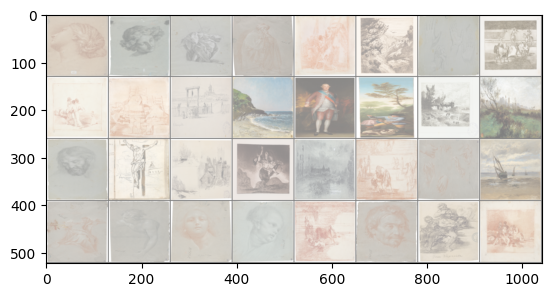

In [ ]:
# show first batch of images
# code taken from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

torch.manual_seed(12345)

def imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
class PradoCNN(nn.Module):
  def __init__(self):
    super(PradoCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(32 * 32 * 32, 128)
    self.fc2 = nn.Linear(128, 3)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 32 * 32 * 32)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = F.softmax(x, dim=1)
    return x

In [ ]:
torch.manual_seed(12345)
model = PradoCNN().to(device)

In [ ]:
torch.manual_seed(12345)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(12345)
train_acc = []
test_acc = []
epochs = []
num_epochs = 25
for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  correct = 0
  total = 0
  for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item() * inputs.size(0)

  epoch_loss = running_loss / len(train_loader.dataset)
  train_accuracy = 100 * correct / total
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  test_accuracy = 100 * correct / total
  epochs.append(epoch+1)
  train_acc.append(train_accuracy)
  test_acc.append(test_accuracy)

  print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/25], Train Loss: 0.9262, Train Accuracy: 64.27%, Test Accuracy: 78.74%
Epoch [2/25], Train Loss: 0.7697, Train Accuracy: 77.95%, Test Accuracy: 72.83%
Epoch [3/25], Train Loss: 0.7440, Train Accuracy: 82.09%, Test Accuracy: 78.35%
Epoch [4/25], Train Loss: 0.7490, Train Accuracy: 79.92%, Test Accuracy: 82.68%
Epoch [5/25], Train Loss: 0.6928, Train Accuracy: 85.93%, Test Accuracy: 82.28%
Epoch [6/25], Train Loss: 0.6824, Train Accuracy: 87.40%, Test Accuracy: 85.83%
Epoch [7/25], Train Loss: 0.6549, Train Accuracy: 90.55%, Test Accuracy: 90.94%
Epoch [8/25], Train Loss: 0.6485, Train Accuracy: 90.65%, Test Accuracy: 83.46%
Epoch [9/25], Train Loss: 0.6321, Train Accuracy: 92.03%, Test Accuracy: 87.40%
Epoch [10/25], Train Loss: 0.6211, Train Accuracy: 94.09%, Test Accuracy: 91.34%
Epoch [11/25], Train Loss: 0.6013, Train Accuracy: 95.37%, Test Accuracy: 89.76%
Epoch [12/25], Train Loss: 0.6080, Train Accuracy: 94.98%, Test Accuracy: 92.52%
Epoch [13/25], Train Loss: 0.5959, Tr

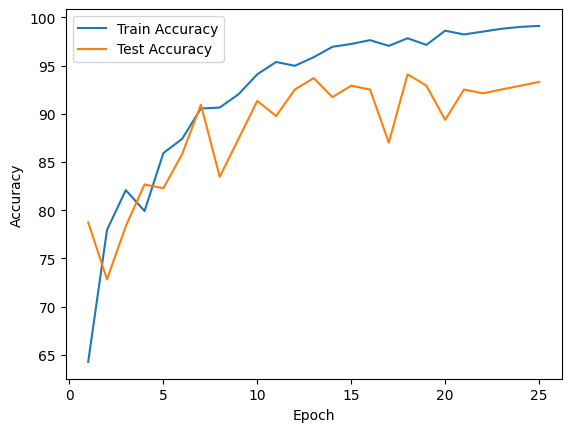

In [ ]:
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, test_acc, label='Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('')
plt.legend()

plt.show()